# Exercise 4

## 1. 4-th order Runge-Kutta method application

### (a) Decrease parameters
Do following variables change:

\begin{equation*}
\xi \equiv \frac{\delta}{\alpha} x,\ \eta \equiv \frac{\beta}{\alpha}y,\ \tau \equiv \alpha t.
\end{equation*}

You get equations like:
\begin{cases}
\dot{\xi} = \xi - \xi\eta,\\
\dot{\eta} = \xi\eta - \frac{\gamma}{\alpha}\eta.
\end{cases}


### (b) Fixed solutions and their stablity
Fixed solution is independent of $t$ or $\tau$. So we have:
\begin{cases}
\xi - \xi\eta = 0,\\
\xi\eta - \frac{\gamma}{\alpha}\eta = 0.
\end{cases}

Solutions, the first of which trivially implies no creatures:

\begin{equation*}
(\xi, \eta)_{1,2} = (0,0),\ (\frac{\gamma}{\alpha},1)
\end{equation*}

For $(\xi, \eta)_{1} = (0,0)$, do a 1-st order perturbation of $(\Delta\xi, \Delta\eta)$:

\begin{cases}
\dot{\xi} = \Delta\xi,\\
\dot{\eta} = - \frac{\gamma}{\alpha}\Delta\eta.
\end{cases}

For $\xi,\ \eta>0$, $\Delta\xi,\ \Delta\eta$ should be set positive. And you see the $\eta$ will be blocked at zero, and $\xi$ increases exponentially. $(\xi, \eta)_{1} = (0,0)$ or $(x, y)_{1} = (0,0)$ is **not a stable fixed solution**.

For $(\xi, \eta)_{2} = (\frac{\gamma}{\alpha},1)$, do the same:

\begin{cases}
\dot{\xi} = -\frac{\gamma}{\alpha}\Delta\eta,\\
\dot{\eta} = \Delta\xi.
\end{cases}

And we get:

\begin{cases}
\ddot{\Delta\xi} = -\frac{\gamma}{\alpha}\Delta\xi,\\
\ddot{\Delta\eta} = -\frac{\gamma}{\alpha}\Delta\eta.
\end{cases}

That's the differential equations for two-dimensional harmonic oscillator, so $(\xi,\eta)$ will revolves around the fixed solution. $(\xi, \eta)_{2} = (\frac{\gamma}{\alpha},1)$ or $(x, y)_{2} = (\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ is **a stable fixed solution**.

### (c) Trace and conserved quantity
\begin{equation*}
\frac{dy}{dx} = \frac{\delta xy-\gamma y}{\alpha x-\beta xy}
\end{equation*}

Total differential form:

\begin{equation*}
\frac{\delta x-\gamma}{x}dx - \frac{\alpha-\beta y}{y} dy = 0
\end{equation*}

Do integral to get conserved quantity of the evolution trace:

\begin{equation*}
\delta x - \gamma \ln{x} + \beta y - \alpha \ln{y} = Const.
\end{equation*}

### (d)  example verification 

In [143]:
from numpy import *
from scipy.misc import derivative
from matplotlib.pyplot import *

Construct "velocity" in the x-y space as a function of the position.

In [144]:
def velocity(position,
             alpha=2/3, beta=4/3, delta=1, gamma=1):
    [x, y] = position
    return array([alpha * x - beta * x * y,
                  delta * x * y - gamma * y])

Construct the recursion relation between neighbouring instance. Constrcut time evolution.

In [145]:
def RK4(f, t, y, h):
    k_1 = f(t, y)
    k_2 = f(t + h/2, y + h/2 * k_1)
    k_3 = f(t + h/2, y + h/2 * k_2)
    k_4 = f(t + h, y + h * k_3)
    return (y + h/6 * (k_1 + 2 * k_2
                       + 2 * k_3 + k_4))

In [146]:
def evolution(f, initial_position, n=10000, h=1e-3):
    positions = dict()
    t = 0
    position = initial_position
    positions[0] = position
    for i in range(n):
        position = RK4(f, t, position, h)
        t += h
        positions[t] = position
        #print('%d interation done' % i)
    return positions

For each given initial position, compute the time evolution to get the trace. 

In [147]:
initial_positions = [array([0.8, 0.8]),
                    array([1.0, 1.0]),
                    array([1.2, 1.2]),
                    array([1.4, 1.4]),
                    array([1.6, 1.6])]

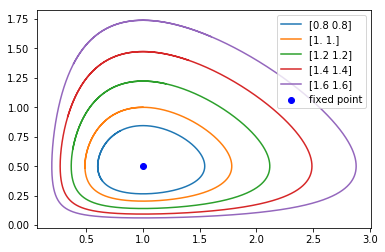

In [148]:
labels = []
traces = []

for initial_position in initial_positions:
    trace = evolution(lambda t, position: velocity(position),
          initial_position).values()
    traces.append(trace)
    x_values = [position[0] for position in trace]
    y_values = [position[1] for position in trace]
    plot(x_values, y_values)
    labels.append(str(initial_position))
    
scatter([1], [1/2], color='blue')
labels.append('fixed point')
legend(labels)

As it turns out, the traces are closed curves, encircling the fixed point. In other words, the point periodically revolves around the fixed point. And it is coherent with our result given by perturbation.

For further verification, we compute the conserved quantity in last subsection for each initial position offered.

In [149]:
def conserved_quantity(position,
                      alpha=2/3, beta=4/3, delta=1, gamma=1):
    [x, y] = position
    return delta * x - gamma * log(x)\
        + beta * y - alpha * log(y)

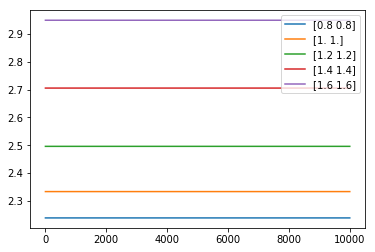

In [150]:
for trace in traces:
    plot([conserved_quantity(position) for position in trace])
    
legend(labels)

The conservation in time evolution is showed correctly for each initial condition.